# Python Final Projec : Seoul Bike Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_union

In [6]:
from flask import Flask

## Importing the data

### Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

### Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Variables and Target

The target here is the number of rented bike. All the other columns will be studied as variables.

In [52]:
seoul=pd.read_csv("sample_data/SeoulBikeData.csv", encoding='latin')
seoul.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Identifying the data

In [9]:
seoul.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [11]:
seoul.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Let us rename our columns appropriately to facilitate our work later on:

In [53]:
seoul.columns = ['date', 'rented_bike_count', 'hour', 'temperature','humidity','wind_speed','visibility','dew_point_temperature','solar_radiation','rainfall','snowfall','seasons','holiday','functioning_day']
seoul.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [54]:
seoul['date']=pd.to_datetime(seoul['date'])
seoul.dtypes

date                     datetime64[ns]
rented_bike_count                 int64
hour                              int64
temperature                     float64
humidity                          int64
wind_speed                      float64
visibility                        int64
dew_point_temperature           float64
solar_radiation                 float64
rainfall                        float64
snowfall                        float64
seasons                          object
holiday                          object
functioning_day                  object
dtype: object

In [55]:
#seoul['year']=seoul.date.strftime('%Y-%m-%d').year
#seoul['month']=seoul.date.strftime('%Y-%m-%d').month
#seoul['day']=seoul.date.strftime('%Y-%m-%d').day
seoul['day'] = seoul.date.dt.day
seoul['month'] = seoul.date.dt.month
seoul['year'] = seoul.date.dt.year
seoul.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


## Preprocessing the data

Let us normalize all the numerical variables as well as the target in order to put them on the same scale and simplify our study.

In [56]:
seoul[['rented_bike_count',"temperature", "humidity", "wind_speed", "visibility", "dew_point_temperature", "solar_radiation", "rainfall"]]=pd.DataFrame(MinMaxScaler().fit_transform(seoul[['rented_bike_count',"temperature", "humidity", "wind_speed", "visibility", "dew_point_temperature", "solar_radiation", "rainfall"]].to_numpy()))
seoul.head()


,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day,month,year
0,2017-01-12,0.071429,0,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,0.057368,1,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,0.048650,2,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,0.030090,3,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,0.021935,4,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [57]:
seoul["seasons"]=pd.DataFrame(LabelEncoder().fit_transform(seoul["seasons"].to_numpy()))
seoul["holiday"]=pd.DataFrame(LabelEncoder().fit_transform(seoul["holiday"].to_numpy()))
seoul["functioning_day"]=pd.DataFrame(LabelEncoder().fit_transform(seoul["functioning_day"].to_numpy()))
seoul.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day,month,year
0,2017-01-12,0.071429,0,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,3,1,1,12,1,2017
1,2017-01-12,0.057368,1,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,3,1,1,12,1,2017
2,2017-01-12,0.048650,2,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,3,1,1,12,1,2017
3,2017-01-12,0.030090,3,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,3,1,1,12,1,2017
4,2017-01-12,0.021935,4,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,3,1,1,12,1,2017


Transformer=StandardScaler()
seoul_std=Transformer.fit_transform(seoul)
seoul_stdc

## Visualizing the data

ConversionError: ignored

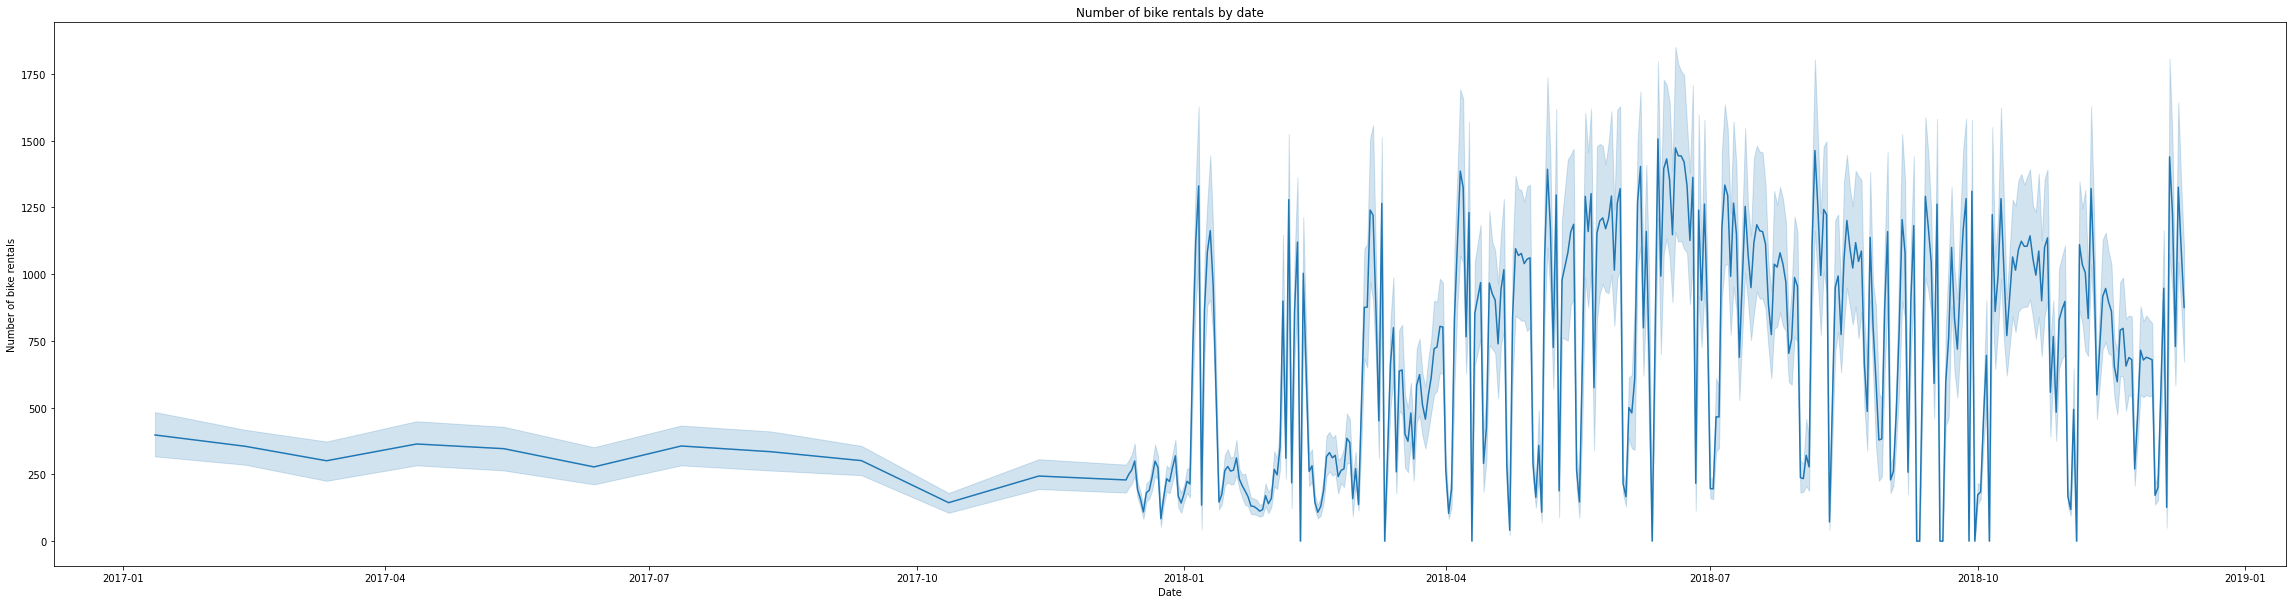

In [35]:
plt.figure(figsize=(40,10))
sb.lineplot(data=seoul, x="date", y="rented_bike_count")
plt.title("Number of bike rentals by date")
plt.xlabel("Date")
plt.ylabel("Number of bike rentals")
plt.xlim(seoul.date.min, seoul.date.max)
plt.tick_params(axis='x', rotation=90)
plt.show()

blablablalrextcfgvbhuidcykdijofdjoko

BONJOUR